### Forecasting time series using Supervised Machine Learning

Reference Link :https://medium.com/@abiolafadeyi10/time-series-forecasting-predicting-stock-prices-using-python-87df91e1fe89

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import warnings 
warnings.filterwarnings('ignore')

In [2]:
tcs = pd.read_csv('TCS_3Y.csv')

In [3]:
tcs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-25,2094.0,2130.000000,2075.050049,2124.949951,2034.402222,3954245
1,2019-10-27,2129.0,2129.000000,2108.800049,2115.699951,2025.546509,224405
2,2019-10-29,2121.5,2201.699951,2121.500000,2194.850098,2101.324219,5064173
3,2019-10-30,2225.0,2260.000000,2176.850098,2252.800049,2156.804932,5195136
4,2019-10-31,2250.0,2284.949951,2237.000000,2269.649902,2172.936523,4879261


In [4]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       746 non-null    object 
 1   Open       746 non-null    float64
 2   High       746 non-null    float64
 3   Low        746 non-null    float64
 4   Close      746 non-null    float64
 5   Adj Close  746 non-null    float64
 6   Volume     746 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.9+ KB


In [5]:
tcs.describe()

,Open,High,Low,Close,Adj Close,Volume
count,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02
mean,2931.996581,2962.379283,2899.371522,2929.895977,2873.596259,3.155327e+06
std,627.743603,627.543919,625.188289,626.918512,638.915305,1.827462e+06
min,1559.699951,1685.449951,1506.050049,1636.349976,1581.652466,2.244050e+05
25%,2247.437500,2269.924926,2221.337586,2248.175049,2178.570496,1.979972e+06
50%,3109.400024,3142.049926,3083.700074,3113.375000,3067.475708,2.690366e+06
75%,3408.512512,3449.387451,3376.624939,3419.962402,3392.209839,3.726294e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,1.983933e+07


In [6]:
tcs['Date']=pd.to_datetime(tcs['Date'])
tcs.set_index('Date',inplace=True)
tcs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-25,2094.0,2130.000000,2075.050049,2124.949951,2034.402222,3954245
2019-10-27,2129.0,2129.000000,2108.800049,2115.699951,2025.546509,224405
2019-10-29,2121.5,2201.699951,2121.500000,2194.850098,2101.324219,5064173
2019-10-30,2225.0,2260.000000,2176.850098,2252.800049,2156.804932,5195136
2019-10-31,2250.0,2284.949951,2237.000000,2269.649902,2172.936523,4879261


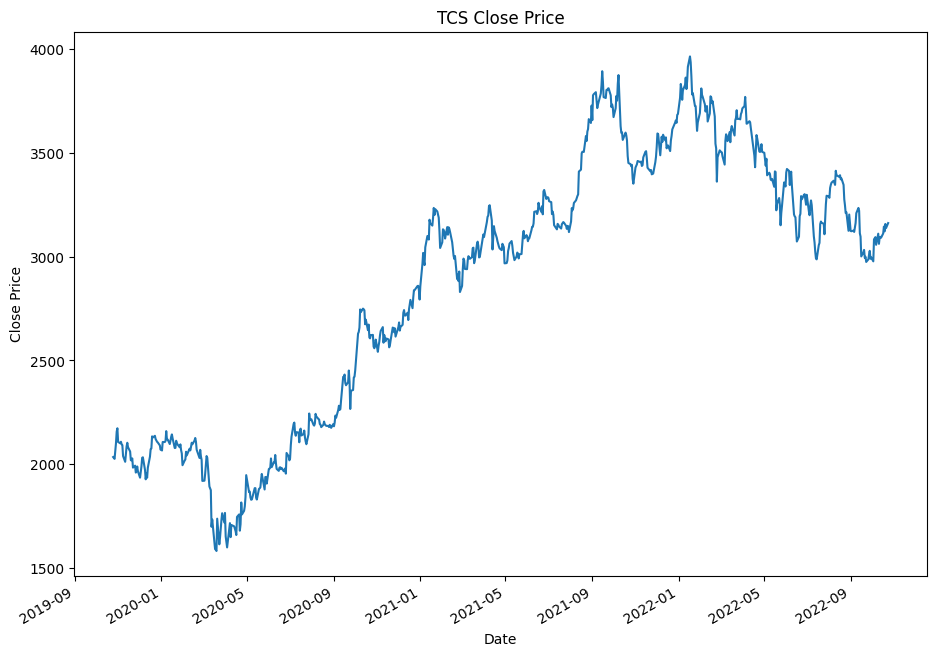

In [7]:
plt.figure(figsize=(11,8))
tcs['Adj Close'].plot()
plt.title('TCS Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

<AxesSubplot: >

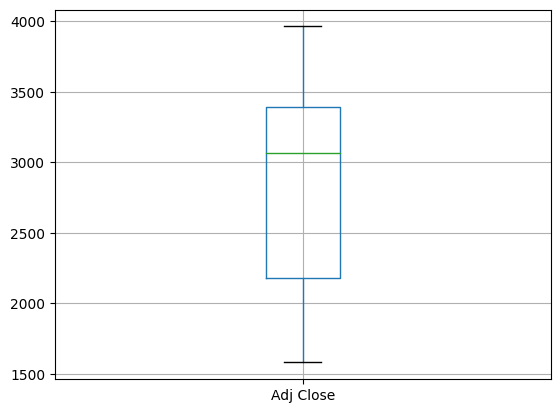

In [8]:
tcs.boxplot(column=['Adj Close'])

<Figure size 1600x800 with 0 Axes>

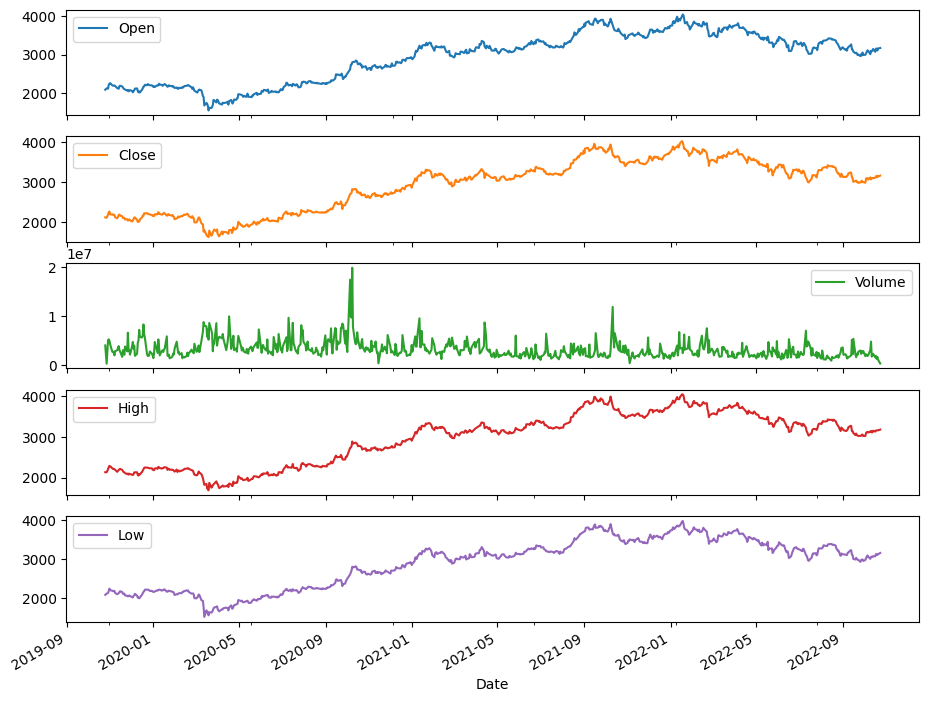

In [9]:
plt.figure(figsize=(16,8))
cols = ['Open','Close','Volume','High','Low']
axes = tcs[cols].plot(figsize=(11,9),subplots=True)
plt.show()

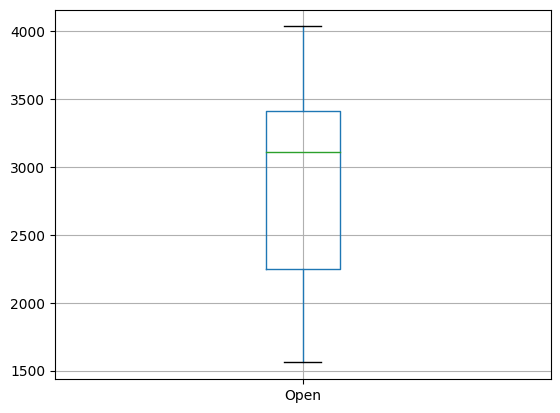

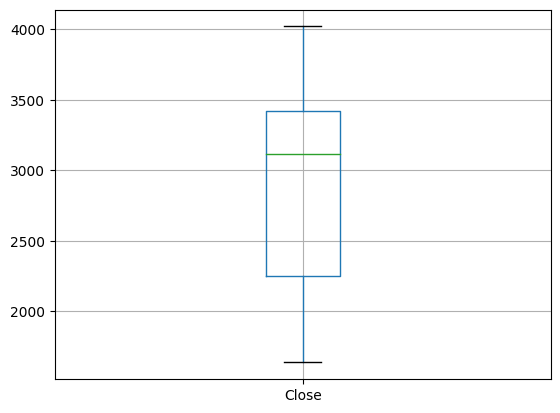

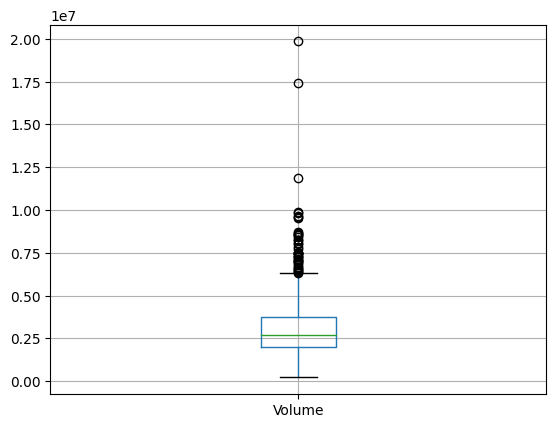

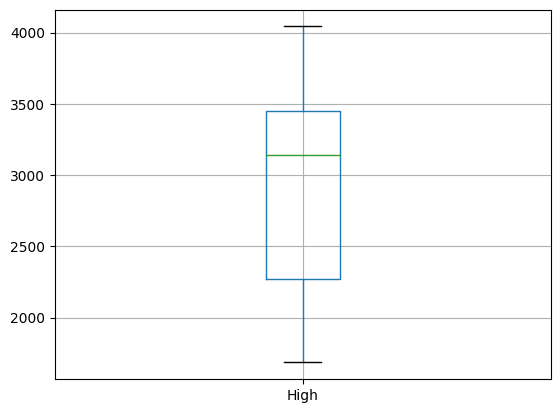

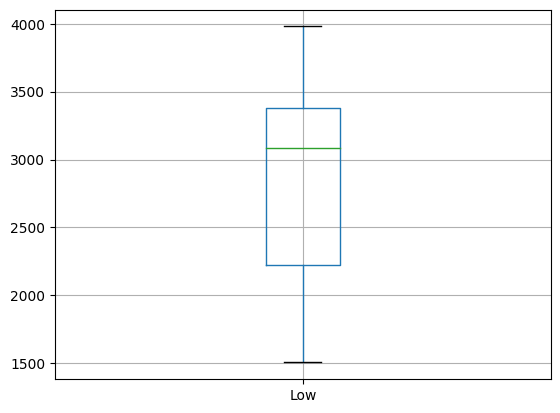

In [10]:
for i in cols:
    plt.subplots()
    axes = tcs.boxplot(column=[i])
plt.show()

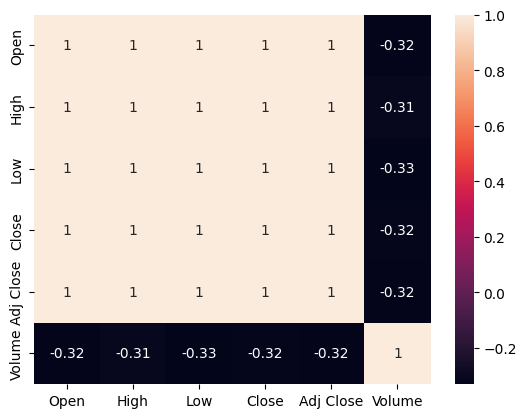

In [11]:
sns.heatmap(tcs.corr(),annot=True);

#### Due to high correlation we need to add some features to the dataset.

In [12]:
# HL_PCT - high-low percentage for each week 
# PCT_change - open-close percentage for each day

In [13]:
tcs['HL_PCT']=(tcs['High']-tcs['Low'])/tcs['Low']*100.0

tcs['PCT_change']=(tcs['Close']-tcs['Open'])/tcs['Open']*100

In [14]:
tcs.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
HL_PCT        0
PCT_change    0
dtype: int64

In [15]:
df = tcs[['HL_PCT',"PCT_change",'Adj Close','Volume']]

In [16]:
forecast_out = int(math.ceil(0.05*len(df)))
print(forecast_out)
df['label']=df['Adj Close'].shift(-forecast_out)

38


In [17]:
# Libraries for model building 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [19]:
scaler = StandardScaler()
X = np.array(df.drop(['label'],1))
scaler.fit(X)
X = scaler.transform(X)

In [20]:
X_pred = X[-forecast_out:]
X = X[:-forecast_out]

In [21]:
df.dropna(inplace=True)

In [22]:
y = np.array(df['label'])

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=7)

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_confidence = lr.score(x_test,y_test)
print('Lr_confidence =',lr_confidence)

Lr_confidence = 0.806977844523974


In [25]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_confidence = rf.score(x_test,y_test)
print('rf_confidence =',rf_confidence)

rf_confidence = 0.8890468422669406


In [26]:
rg = Ridge()
rg.fit(x_train,y_train)
rg_confidence = rg.score(x_test,y_test)
print('rg_confidence =',rg_confidence)

rg_confidence = 0.8071044220927447


In [27]:
svr = SVR()
svr.fit(x_train,y_train)
svr_confidence = svr.score(x_test,y_test)
print('svr_confidence =',svr_confidence)

svr_confidence = 0.1636334793073828


In [28]:
names = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.806978
1,Random Forest,0.889047
2,Ridge,0.807104
3,SVR,0.163633


In [29]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rg.predict(X_pred) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

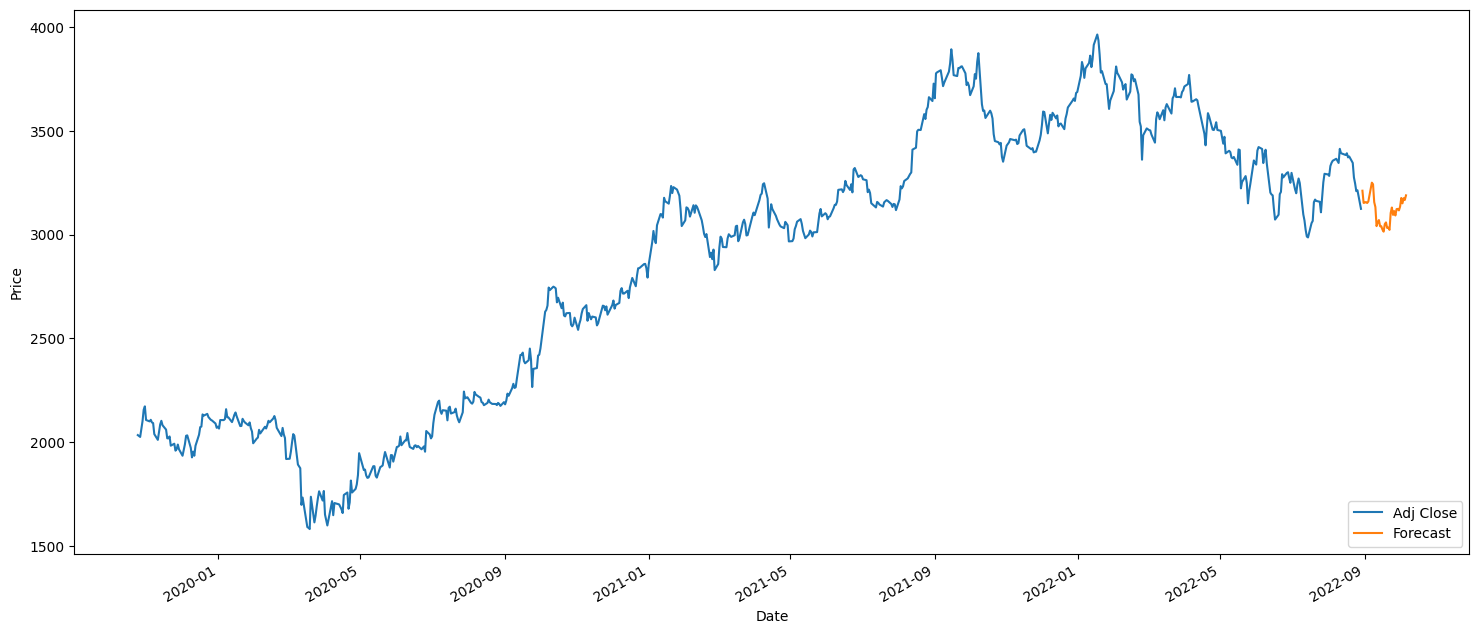

In [30]:
plt.figure(figsize=(18,8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [31]:
forecast_set

array([3211.83653888, 3152.88899566, 3154.6132683 , 3157.31521664,
       3152.53211089, 3160.01294807, 3191.48860218, 3220.64254712,
       3250.63853984, 3242.91685856, 3156.94877363, 3133.02716252,
       3041.20197924, 3060.00555674, 3070.47482272, 3040.80377776,
       3040.79416903, 3024.56500647, 3014.63170482, 3051.15971706,
       3059.15526638, 3032.47318307, 3034.30012117, 3023.21277493,
       3104.87432741, 3131.0298174 , 3095.34020075, 3113.73587949,
       3092.46090717, 3123.23408151, 3124.10042105, 3117.09181936,
       3135.58424566, 3177.02014206, 3150.98369428, 3175.92088956,
       3167.49825536, 3189.53328951])